In [1]:
pip install mne

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import numpy as np
import mne

In [3]:
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                                    'sample_audvis_filt-0-40_raw.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file)

Using default location ~/mne_data for sample...
Creating ~/mne_data
[............................................................] 100.00% ( 1.54 GB,  18.0 MB/s) //
Verifying hash fc2d5b9eb0a144b1d6ba84dc3b983602.
Decompressing the archive: C:\Users\rkm14\mne_data\MNE-sample-data-processed.tar.gz
(please be patient, this can take some time)
Successfully extracted to: ['C:\\Users\\rkm14\\mne_data\\MNE-sample-data']
Attempting to create new mne-python configuration file:
C:\Users\rkm14\.mne\mne-python.json
Opening raw data file C:\Users\rkm14\mne_data\MNE-sample-data\MEG\sample\sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Current compensation grade : 0


In [4]:
print(raw)
print(raw.info)

<Raw  |  sample_audvis_filt-0-40_raw.fif, n_channels x n_times : 376 x 41700 (277.7 sec), ~3.6 MB, data not loaded>
<Info | 19 non-empty fields
    bads : list | MEG 2443, EEG 053
    ch_names : list | MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, ...
    chs : list | 376 items (GRAD: 204, MAG: 102, STIM: 9, EEG: 60, EOG: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    dig : Digitization | 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
    events : list | 0 items
    file_id : dict | 4 items
    highpass : float | 0.10000000149011612 Hz
    hpi_meas : list | 1 items
    hpi_results : list | 1 items
    lowpass : float | 40.0 Hz
    meas_date : tuple | 2002-12-03 19:01:10 GMT
    meas_id : dict | 4 items
    nchan : int | 376
    proc_history : list | 0 items
    projs : list | PCA-v1: off, PCA-v2: off, PCA-v3: off, ...
    sfreq : float | 150.15374755859375 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_

In [5]:
raw.plot_psd(fmax=50)
raw.plot(duration=5, n_channels=30)

Effective window size : 13.639 (s)
Effective window size : 13.639 (s)
Effective window size : 13.639 (s)


<Figure size 640x480 with 6 Axes>

<Figure size 640x480 with 5 Axes>

<Figure size 640x480 with 5 Axes>

Fitting ICA to data using 364 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selection by number: 20 components
Fitting ICA took 2.7s.
    Using multitaper spectrum estimation with 7 DPSS windows
138 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
138 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


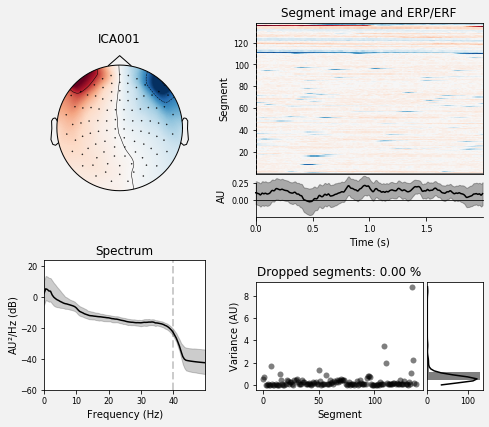

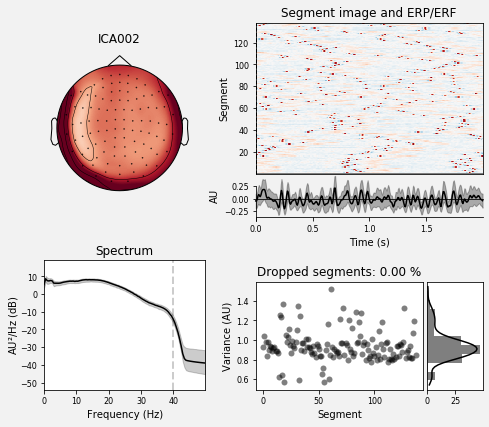

[<Figure size 504x432 with 6 Axes>, <Figure size 504x432 with 6 Axes>]

In [6]:
# set up and fit the ICA
ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(raw)
ica.exclude = [1, 2]  # details on how we picked these are omitted here
ica.plot_properties(raw, picks=ica.exclude)

In [7]:
# 필요한 데이터를 로드하기 위해 경로설정을 해줍니다.
from mne.datasets import sample  # noqa 패치지 임포트
data_path = sample.data_path()
raw_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw.fif'
print(raw_fname)

C:\Users\rkm14\mne_data\MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif


In [20]:
# 데이터를 읽고 정보를 표시합니다.
raw = mne.io.read_raw_fif(raw_fname)
print(raw)
print(raw.info)

Opening raw data file C:\Users\rkm14\mne_data\MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Current compensation grade : 0
<Raw  |  sample_audvis_filt-0-40_raw.fif, n_channels x n_times : 376 x 41700 (277.7 sec), ~3.6 MB, data not loaded>
<Info | 19 non-empty fields
    bads : list | MEG 2443, EEG 053
    ch_names : list | MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, ...
    chs : list | 376 items (GRAD: 204, MAG: 102, STIM: 9, EEG: 60, EOG: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    dig : Digitization | 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
    events : list | 0 items
    file_id : dict | 4 items
    highpass : float | 0.10000000149011612 Hz
    hpi_

(376, 2252)
(2252,)


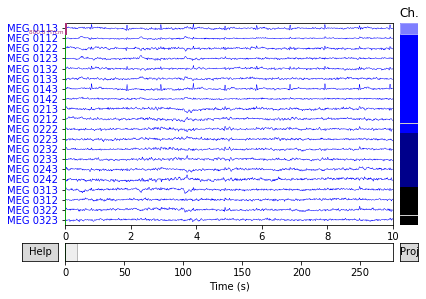

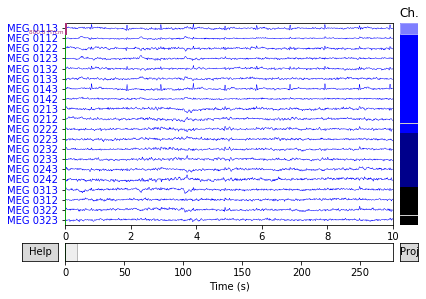

In [8]:
# 특정시간의 데이터를 가져와 대략의 데이터를 보도록 합니다.
start, stop = raw.time_as_index([100, 115])  # 가져올 데이터의 시작과 끝을 정함
data, times = raw[:, start:stop]
print(data.shape)
print(times.shape)
data, times = raw[2:20:3, start:stop]  # 가져올 데이터에 접근합니다.
raw.plot()

In [9]:
# 원 데이터의 150번째 세그먼트를 저장합니다.(MEG만)
picks = mne.pick_types(raw.info, meg=True, eeg=False, stim=True,
                       exclude='bads')
raw.save('sample_audvis_meg_raw.fif', tmin=0, tmax=150, picks=picks,
         overwrite=True)

Writing D:\Jupyther\alone\sample_audvis_meg_raw.fif
Closing D:\Jupyther\alone\sample_audvis_meg_raw.fif [done]


In [10]:
# 가장 먼저 이벤트를 추출합니다. 
events = mne.find_events(raw, stim_channel='STI 014')
print(events[:5])

319 events found
Event IDs: [ 1  2  3  4  5 32]
[[6994    0    2]
 [7086    0    3]
 [7192    0    1]
 [7304    0    4]
 [7413    0    2]]


- stim_channel='STI 014'와 다른 시스템을 사용한다면 아래와 같은 방법으로 시스템 디폴트를 재설정 해줄 수 있습니다. 

In [11]:
mne.set_config('MNE_STIM_CHANNEL', 'STI101', set_env=True)

- 이벤트들은 2차원의 numpy배열로 저장됩니다. 첫번째 열은 시간 인스턴트이고 마지막 열은 이벤트 번호입니다. 
- 에폭 변수를 정의해 줍니다.

In [12]:
event_id = dict(aud_l=1, aud_r=2)  # event trigger and conditions
tmin = -0.2  # start of each epoch (200ms before the trigger)
tmax = 0.5  # end of each epoch (500ms after the trigger)

- 몇몇 채널들을 제외해 줍니다.

In [13]:
raw.info['bads'] += ['MEG 2443', 'EEG 053']

- 제외할 채널들을 제외하고 좋은 채널들을 선별해 줍니다. 

In [14]:
picks = mne.pick_types(raw.info, meg=True, eeg=True, eog=True, stim=False,
                       exclude='bads')

- 아래의 방법으로 그래디오미터나 마그네토미터로 제한할 수 있습니다. 

In [15]:
mag_picks = mne.pick_types(raw.info, meg='mag', eog=True, exclude='bads')
grad_picks = mne.pick_types(raw.info, meg='grad', eog=True, exclude='bads')

- 기본 분기를 정의해 줍니다.

In [16]:
baseline = (None, 0)  # means from the first instant to t = 0

- 그래디오미터와 마그네토미터 EOG에 대한 peak-to-peak 제거 변수를 정의해 줍니다.

In [17]:
reject = dict(grad=4000e-13, mag=4e-12, eog=150e-6)

In [21]:
# 에폭을 읽습니다.
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True, picks=picks,
                    baseline=baseline, preload=False, reject=reject)
print(epochs)

145 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
Created an SSP operator (subspace dimension = 4)
4 projection items activated
<Epochs  |   145 events (good & bad), -0.199795 - 0.499488 sec, baseline [None, 0], ~3.6 MB, data not loaded,
 'aud_l': 72
 'aud_r': 73>


In [22]:
#하나의 조건을 위해 단일 에폭을 얻습니다.
epochs_data = epochs['aud_l'].get_data()
print(epochs_data.shape)

Loading data for 72 events and 106 original time points ...
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
17 bad epochs dropped
(55, 365, 106)


- epoch_data는 3차원 array 입니다. 

In [43]:
from scipy import io  # noqa
io.savemat('epochs_data.mat', dict(epochs_data=epochs_data), oned_as='row')
# 단일 시도를 위와같이 저장할 수 있습니다. 

In [24]:
epochs.save('sample-epo.fif')
# 혹은 위와같이 모두 fif파일로 저장할 수 있습니다.

Loading data for 145 events and 106 original time points ...
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']


<ipython-input-24-3711aaadc051>:1: DeprecationWarning: overwrite defaults to True in 0.18 but will change to False in 0.19, set it explicitly to avoid this warning
  epochs.save('sample-epo.fif')


    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['

In [25]:
saved_epochs = mne.read_epochs('sample-epo.fif')
# 다음에 읽어올 때 사용

Reading sample-epo.fif ...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -199.80 ...     499.49 ms
        0 CTF compensation matrices available
116 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
Created an SSP operator (subspace dimension = 4)
4 projection items activated


<Evoked  |  'aud_l' (average, N=55), [-0.1998, 0.49949] sec, 364 ch, ~3.9 MB>


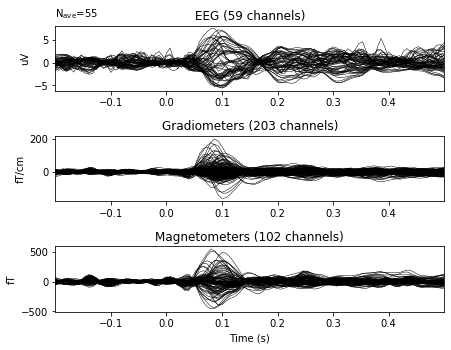

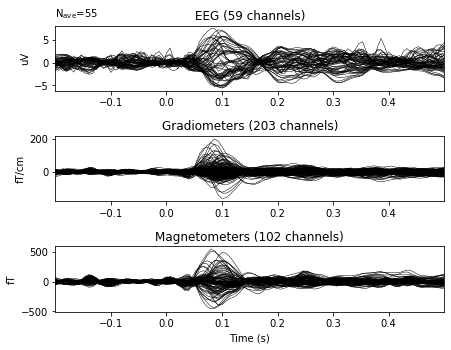

In [26]:
# 평균으로 청각 반응들에 대한 유발된 반응들을 계산하고 나타내 줍니다. 
evoked = epochs['aud_l'].average()
print(evoked)
evoked.plot()

#### exercise 
- 각 에폭에서 가장 큰 값들을 추출합니다

In [27]:
max_in_each_epoch = [e.max() for e in epochs['aud_l']]  # doctest:+ELLIPSIS
print(max_in_each_epoch[:4])  # doctest:+ELLIPSIS

[1.937516720163134e-05, 1.6405516986429127e-05, 1.8545377810380145e-05, 2.0412807568093327e-05]


In [28]:
# fif 파일로 유발된 데이터들을 읽어오는 것도 가능합니다
evoked_fname = data_path + '/MEG/sample/sample_audvis-ave.fif'
evoked1 = mne.read_evokeds(
    evoked_fname, condition='Left Auditory', baseline=(None, 0), proj=True)

Reading C:\Users\rkm14\mne_data\MNE-sample-data/MEG/sample/sample_audvis-ave.fif ...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (Left Auditory)
        0 CTF compensation matrices available
        nave = 55 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
Applying baseline correction (mode: mean)


In [29]:
evoked2 = mne.read_evokeds(
    evoked_fname, condition='Right Auditory', baseline=(None, 0), proj=True)

Reading C:\Users\rkm14\mne_data\MNE-sample-data/MEG/sample/sample_audvis-ave.fif ...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (Right Auditory)
        0 CTF compensation matrices available
        nave = 61 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
Applying baseline correction (mode: mean)


- mne.combine_evoked()를 사용하면 두개의 유발된 객체를 대조할 수 있습니다.

In [30]:
contrast = mne.combine_evoked([evoked1, evoked2], weights=[0.5, -0.5])
contrast = mne.combine_evoked([evoked1, -evoked2], weights='equal')
print(contrast)

<Evoked  |  '1.000 * Left Auditory + 1.000 * -Right Auditory' (average, N=28.922413793103452), [-0.1998, 0.49949] sec, 376 ch, ~4.8 MB>


- 숫자의 평균에 기반한 가중합계를 구하기 위해, 즉 mne.Evoked 예의 사용 전에 mne.Epochs에서 모든 시도를 함께 풀림한 것에서 얻어지는 것들, weight = 'nave' 조건을 사용할 수 있습니다. 

In [31]:
average = mne.combine_evoked([evoked1, evoked2], weights='nave')
print(contrast)

<Evoked  |  '1.000 * Left Auditory + 1.000 * -Right Auditory' (average, N=28.922413793103452), [-0.1998, 0.49949] sec, 376 ch, ~4.8 MB>


- 평균의 숫자가 잘 맞지 않는것에 신경쓰기 보다, 대저를 계산하기 전에 역이미징의 장점이 있는 시도-횟수 평등화를 사용할 수 있습니다. 

In [32]:
epochs_eq = epochs.copy().equalize_event_counts(['aud_l', 'aud_r'])[0]
evoked1, evoked2 = epochs_eq['aud_l'].average(), epochs_eq['aud_r'].average()
print(evoked1)
print(evoked2)
contrast = mne.combine_evoked([evoked1, -evoked2], weights='equal')
print(contrast)

Dropped 6 epochs
<Evoked  |  'aud_l' (average, N=55), [-0.1998, 0.49949] sec, 364 ch, ~3.9 MB>
<Evoked  |  'aud_r' (average, N=55), [-0.1998, 0.49949] sec, 364 ch, ~3.9 MB>
<Evoked  |  '1.000 * aud_l + 1.000 * -aud_r' (average, N=27.5), [-0.1998, 0.49949] sec, 364 ch, ~3.9 MB>


In [33]:
import numpy as np  # noqa
n_cycles = 2  # number of cycles in Morlet wavelet
freqs = np.arange(7, 30, 3)  # frequencies of interest

- 유도된 힘과 단계-잠금 값을 계산하고 그래디오미터를 보여줍니다.

Loading data for 116 events and 106 original time points ...
No baseline correction applied


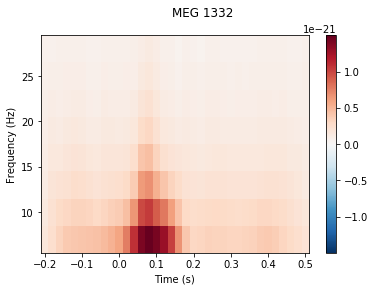

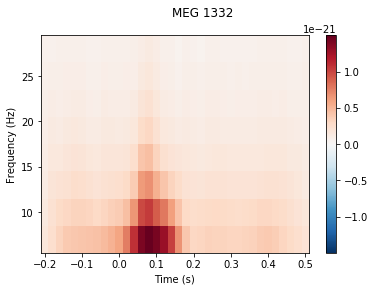

In [34]:
from mne.time_frequency import tfr_morlet  # noqa
power, itc = tfr_morlet(epochs, freqs=freqs, n_cycles=n_cycles,
                        return_itc=True, decim=3, n_jobs=1)
power.plot([power.ch_names.index('MEG 1332')])

#### 역 모델링 : 유발된 혹은 기본 데이터의 MNE 와 dSPM 

In [35]:
from mne.minimum_norm import apply_inverse, read_inverse_operator  # noqa
# 패키지 임포트

In [36]:
fname_inv = data_path + '/MEG/sample/sample_audvis-meg-oct-6-meg-inv.fif'
inverse_operator = read_inverse_operator(fname_inv)
# 역 연산자를 읽어오기

Reading inverse operator decomposition from C:\Users\rkm14\mne_data\MNE-sample-data/MEG/sample/sample_audvis-meg-oct-6-meg-inv.fif...
    Reading inverse operator info...
    [done]
    Reading inverse operator decomposition...
    [done]
    305 x 305 full covariance (kind = 1) found.
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Noise covariance matrix read.
    22494 x 22494 diagonal covariance (kind = 2) found.
    Source covariance matrix read.
    22494 x 22494 diagonal covariance (kind = 6) found.
    Orientation priors read.
    22494 x 22494 diagonal covariance (kind = 5) found.
    Depth priors read.
    Did not find the desired covariance matrix (kind = 3)
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    Reading a source space...
    Computing 

In [37]:
# 변수 설정
snr = 3.0
lambda2 = 1.0 / snr ** 2
method = "dSPM"

In [38]:
# 역 해법 계산
stc = apply_inverse(evoked, inverse_operator, lambda2, method)

Preparing the inverse operator for use...
    Scaled noise and source covariance from nave = 1 to nave = 55
    Created the regularized inverter
    Created an SSP operator (subspace dimension = 3)
    Created the whitener using a noise covariance matrix with rank 302 (3 small eigenvalues omitted)
    Computing noise-normalization factors (dSPM)...
[done]
Applying inverse operator to "aud_l"...
    Picked 305 channels from the data
    Computing inverse...
    Eigenleads need to be weighted ...
    Computing residual...
    Explained  59.3% variance
    Combining the current components...
    dSPM...
[done]


In [39]:
stc.save('mne_dSPM_inverse') # 저장

Writing STC to disk...
[done]


#### 라벨을 포함한 기본 데이터의 dSPM 계산

In [40]:
fname_label = data_path + '/MEG/sample/labels/Aud-lh.label'
label = mne.read_label(fname_label) 

In [41]:
# 처음 15초동안의 역 해법 계산
from mne.minimum_norm import apply_inverse_raw  # noqa
start, stop = raw.time_as_index([0, 15])  # read the first 15s of data
stc = apply_inverse_raw(raw, inverse_operator, lambda2, method, label,
                        start, stop)

Preparing the inverse operator for use...
    Scaled noise and source covariance from nave = 1 to nave = 1
    Created the regularized inverter
    Created an SSP operator (subspace dimension = 3)
    Created the whitener using a noise covariance matrix with rank 302 (3 small eigenvalues omitted)
    Computing noise-normalization factors (dSPM)...
[done]
Applying inverse to raw...
    Picked 305 channels from the data
    Computing inverse...
    Eigenleads need to be weighted ...
    combining the current components...
[done]


In [42]:
stc.save('mne_dSPM_raw_inverse_Aud') # 저장

Writing STC to disk...
[done]
